# Reading, processing and plotting EOG data

Using pandas and matplotlib to process and plot data from electrooculography(EOG) experiments, data provided by @pfaion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Reading in the data

In [2]:
data = pd.read_csv('data.csv', header=0)
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data.set_index(['timestamp'], inplace=True)

data.head()

,ch0,ch1
timestamp,,
2017-02-10 11:03:00.857398,-450.0,738.0
2017-02-10 11:03:00.857440,-451.0,736.0
2017-02-10 11:03:00.857466,-453.0,730.0
2017-02-10 11:03:00.857487,-458.0,736.0
2017-02-10 11:03:00.857507,-453.0,747.0


In [3]:
stimuli = pd.read_csv('stimuli.csv', header=0)
stimuli['timestamp'] = pd.to_datetime(stimuli['timestamp'], unit='s')
stimuli.index = stimuli['timestamp']
stimuli.head()

,timestamp
timestamp,
2017-02-10 11:03:03.340404,2017-02-10 11:03:03.340404
2017-02-10 11:03:04.385859,2017-02-10 11:03:04.385859
2017-02-10 11:03:05.307485,2017-02-10 11:03:05.307485
2017-02-10 11:03:06.207690,2017-02-10 11:03:06.207690
2017-02-10 11:03:07.220146,2017-02-10 11:03:07.220146


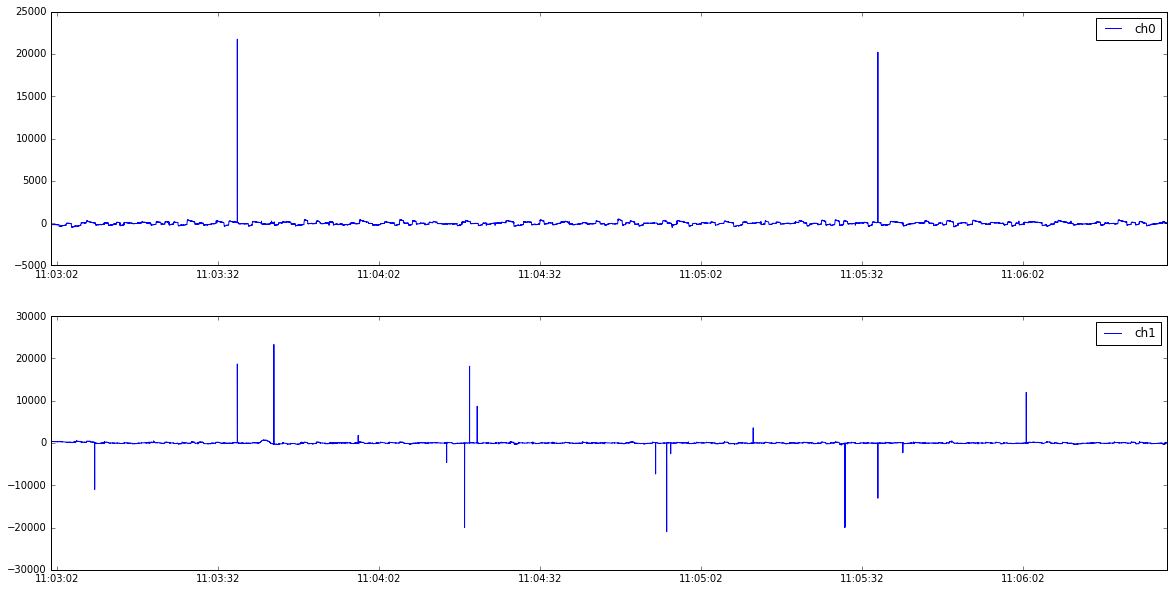

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(data['ch0'])
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['ch1'])
plt.legend()

# Cleaning the data
Clean the data for both channels with median smoothing

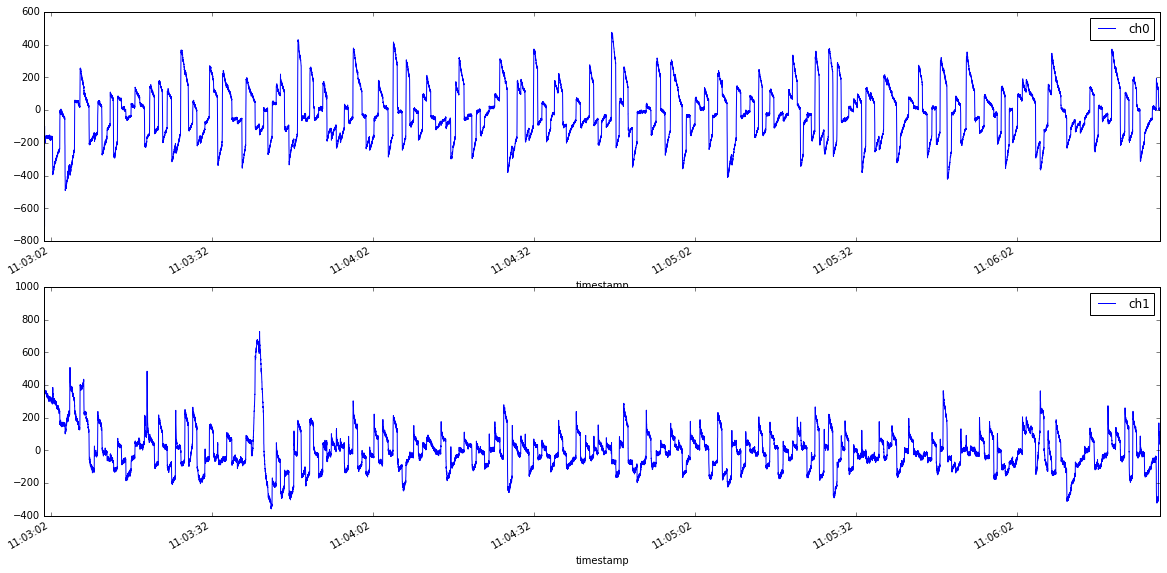

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
pd.Series(data['ch0'].rolling(3, min_periods=1).median()).plot()
plt.legend()
plt.subplot(2,1,2)
pd.Series(data['ch1'].rolling(3, min_periods=1).median()).plot()
plt.legend()

# Getting windows of data
a function to get widows from -0.2 to +0.5 seconds relative to the stimulation time

In [7]:
def get_all_windows(data, stimuli):
    windows_ch0, windows_ch1  = [[] for i in range(len(stimuli))], [[] for i in range(len(stimuli))]
    for i,n in enumerate(stimuli.index):
        for j in data.index:
            if n == j:
                a = data.ch0[j-pd.DateOffset(seconds=0.2):j+pd.DateOffset(seconds=0.6)]
                b = data.ch1[j-pd.DateOffset(seconds=0.2):j+pd.DateOffset(seconds=0.6)]
            
                a.index = (a.index-n).total_seconds()
                b.index = (b.index-n).total_seconds()
                windows_ch0[i] = a
                windows_ch1[i] = b
    return np.asarray(windows_ch0), np.asarray(windows_ch1)

In [8]:
windows_ch0, windows_ch1 = get_all_windows(data, stimuli)
 

# Getting locations of peaks
a function to get exact locations of jumps caused by stimulation 

In [4]:
def get_peak(window):
    peak = lambda nda: abs(nda[9]- nda[0]) 
    window = window.rolling(5).median()
    peaks = window.rolling(10).apply(peak).idxmax()
    return peaks

# Plotting sample results
plots of 4 different stimulation times

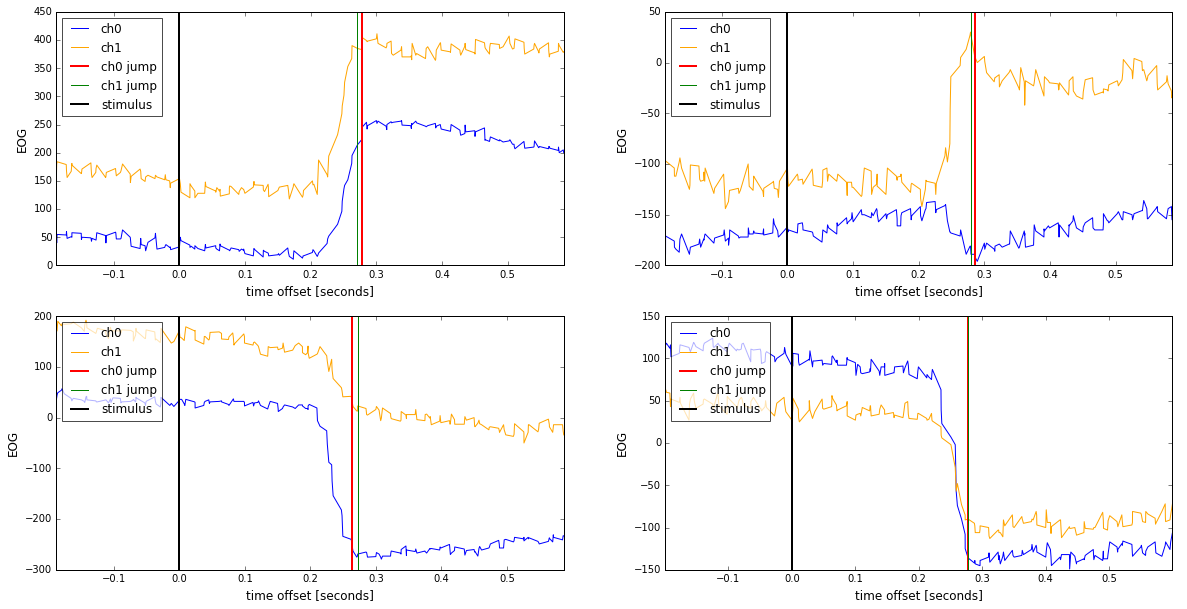

In [155]:
pics = [4,7,9,21]
plt.figure(figsize=(20,10))
for n,i in enumerate(pics):
    plt.subplot(2,2,n+1)
    windows_ch0[i].plot(color='blue')
    windows_ch1[i].plot(color='orange')
    plt.axvline(get_peak(windows_ch0[i]),linewidth=2, color='r', label='ch0 jump')
    plt.axvline(get_peak(windows_ch1[i]),color='g', label='ch1 jump')
    plt.axvline(0, color='black',  label='stimulus',linewidth=2)
    plt.legend(loc=2, framealpha = 0.7)
    plt.xlabel('time offset [seconds]', fontsize='12')
    plt.ylabel('EOG', fontsize='12')